# Perceptron with 1 input 2 hidden and 1 output layers 
$$
E = \frac{1}{2}(a2 - y)^2
$$
<img src="perceptron.png" height="400" width="600" />

In [ ]:
import numpy as np
# updated from Valerio Velardo's code for multi-layer perceptron by John R Williams

def MLP(num_inputs=3, hidden_layers=[3, 3], num_outputs=2):
    # A Multilayer Perceptron function.
    # Constructor for the MLP. Takes the number of inputs,
    # a variable number of hidden layers, and number of outputs
    #Args:
    # num_inputs (int): Number of inputs
    # hidden_layers (list): A list of ints for the hidden layers
    # num_outputs (int): Number of outputs

    # create a generic representation of the layers
    layers = [num_inputs] + hidden_layers + [num_outputs]
    print(f"layers: {layers}")
    # create random connection weights for the layers
    weights = []
    for i in range(len(layers)-1):
        w = np.random.rand(layers[i], layers[i+1])   # matrix of random weights between layers i and i+1
        print(w.shape)   # this will be a 3,3 or 3,2 matrix 
        weights.append(w)
    return layers, weights





In [ ]:
def forward_propagate(inputs, weights):
    # Computes forward propagation of the network based on input signals.
    # Args:
    #    inputs (ndarray): Input signals
    #    weights (list): Weights of the network
    # Returns:
    #   activations (ndarray): Output values

    # the input layer activation is just the input itself
    activations = inputs

    # iterate through the network layers - this is the forward propagation
    for w in weights:

        # calculate matrix multiplication between previous activation and weight matrix
        net_inputs = np.dot(activations, w)

        # apply sigmoid activation function - these become the inputs to the next layer
        activations = sigmoid(net_inputs)

    # return output layer activation ie the last layer
    return activations


def sigmoid(x):
    # Sigmoid activation function
    # Args:
    #   x (float): Value to be processed
    # Returns:
    #   y (float): Output

    y = 1.0 / (1 + np.exp(-x))
    return y



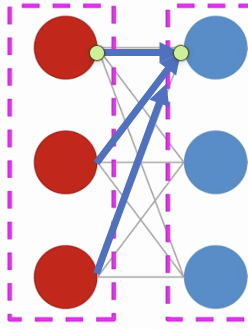

In [2]:

# create a Multilayer Perceptron
num_inputs = 3
hidden_layers = [3, 3]
num_outputs = 2
layers, weights = MLP(num_inputs, hidden_layers, num_outputs)
print(f"weights: {weights}")
# set random values for network's input
inputs = np.random.rand(num_inputs)

# perform forward propagation
output = forward_propagate(inputs, weights)

print("Network activation: {}".format(output))


layers: [3, 3, 3, 2]
(3, 3)
(3, 3)
(3, 2)
weights: [array([[0.59867418, 0.37014712, 0.51192599],
       [0.57600142, 0.46395293, 0.16413306],
       [0.05027112, 0.0127874 , 0.0216734 ]]), array([[0.3789039 , 0.93073371, 0.00550084],
       [0.7050143 , 0.26366547, 0.79729175],
       [0.39003462, 0.86000499, 0.40840231]]), array([[0.22508089, 0.00466134],
       [0.03610885, 0.99007383],
       [0.97164739, 0.95858361]])]
<class 'list'>
Network activation: [0.70443466 0.81286102]


$
\text{Now lets propagate the error back one layer  } \\
$

$$
\frac{\partial E}{\partial W_2} = \frac{\partial E}{\partial a_3}\frac{\partial a_3}{\partial h_3}\frac{\partial h_3}{\partial W_2}
$$

$$
a_3 = \frac{1}{1 + e^{-h_3}} 
$$
$
\text{The derivative of the sigmoid function can be written as follows:}
$
$$
s'  = s(1 + s)
$$
$$
h_3=a_2W_2
$$



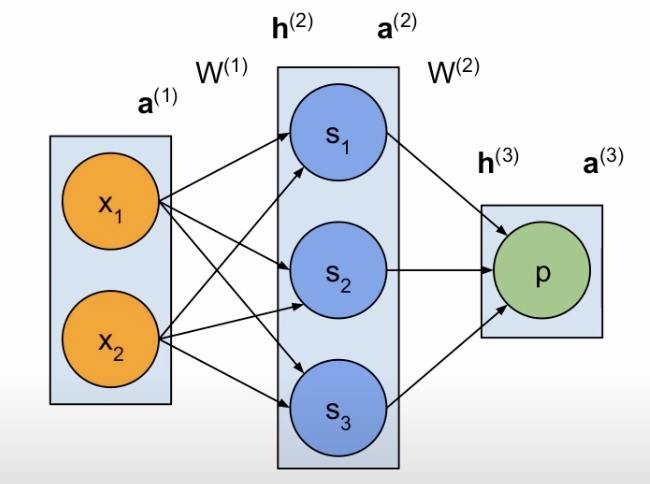

# Back Propagation 

$
\text{We need to calculate the gradient of the Error with respect to W} \\
\text{Let h be the input to the sigmoid function and the output is the activation for next layer}
$
$$
E = \frac{1}{2}(a_3 - y)^2
$$
$$
\frac{\partial E}{\partial W_2} = \frac{\partial E}{\partial a_3}\frac{\partial a_3}{\partial h_3}\frac{\partial h_3}{\partial W_2}
$$
$
\text{Lets take each term in the partial derivative}
$
$$
\frac{\partial E}{\partial a_3} = (a_3 - y)
$$
$
\text{Now deal with the sigmoid funcction}
$
$$
a_3 = \frac{1}{(1+\exp{-h_3})}
$$
$$
\sigma(x) = \frac{1}{(1+\exp{-x})}
$$
$$
\frac{\partial \sigma}{\partial x} = \sigma(x)(1 - \sigma(x))
$$
$$
\frac{\partial a_3}{\partial h_3} = \sigma(h_3)(1 - \sigma(h_3))
$$
$
\text{Now deal with the input to the sigmoid}
$
$$
h_3 = a_2 W_2 
$$
$$
\frac{\partial h_3}{\partial W_2} = a_2
$$

$
\text{Now lets propagate the error back one layer further } \\
$

$$
\frac{\partial E}{\partial W_1} = \frac{\partial E}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial W_1}
$$

$$
\frac{\partial E}{\partial a_2} = \frac{\partial E}{\partial a_3}\frac{\partial a_3}{\partial h_3}\frac{\partial h_3}{\partial a_2}
$$
$$
\frac{\partial E}{\partial W_1} = \frac{\partial E}{\partial a_3}\frac{\partial a_3}{\partial h_3}\frac{\partial h_3}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial W_1}
$$

$
\text{Note: We have already calculated the first two terms of this expression } \\
$